In [160]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
from scipy import stats
from sklearn import preprocessing

In [161]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [162]:
#reading input data
dftrain = pd.read_csv('datasaet1.csv')

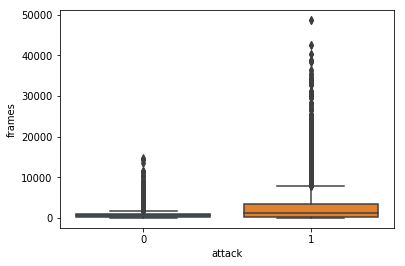

In [163]:
sns.boxplot(x=dftrain['attack'],y=dftrain['frames'])

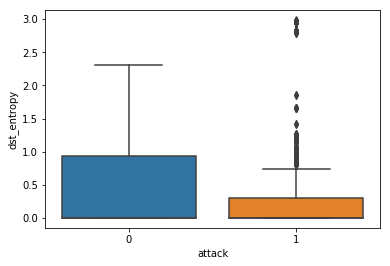

In [164]:
sns.boxplot(x=dftrain['attack'],y=dftrain['dst_entropy'])

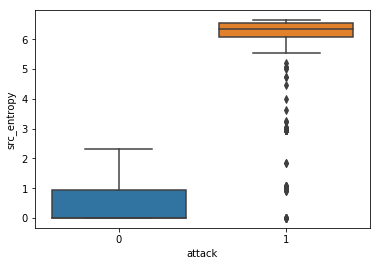

In [165]:
sns.boxplot(x=dftrain['attack'],y=dftrain['src_entropy'])

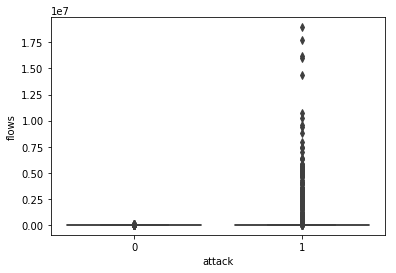

In [166]:
sns.boxplot(x=dftrain['attack'],y=dftrain['flows'])

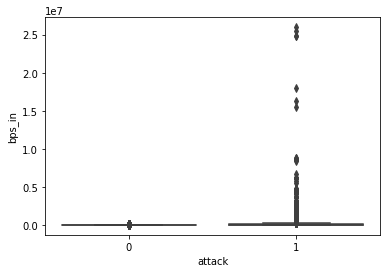

In [167]:
sns.boxplot(x=dftrain['attack'],y=dftrain['bps_in'])

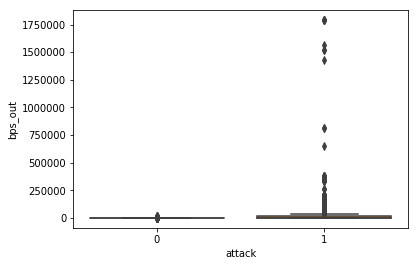

In [168]:
sns.boxplot(x=dftrain['attack'],y=dftrain['bps_out'])

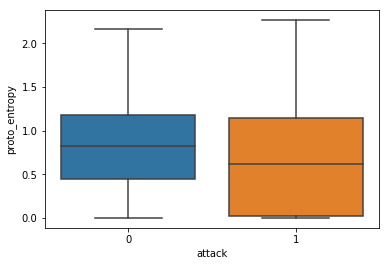

In [169]:
sns.boxplot(x=dftrain['attack'],y=dftrain['proto_entropy'])

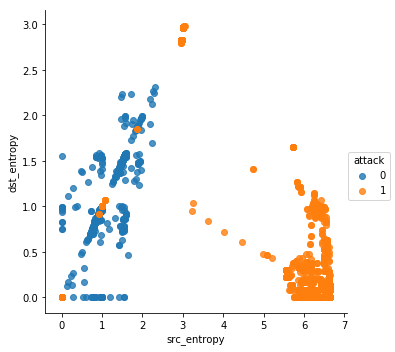

In [170]:
facet = sns.lmplot(data=dftrain,x='src_entropy' , y='dst_entropy',hue='attack',fit_reg=False,legend=True,legend_out=True)

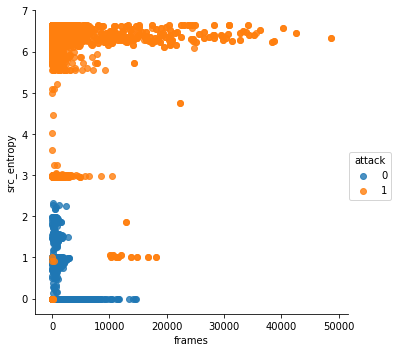

In [171]:
facet = sns.lmplot(data=dftrain,x='frames' , y='src_entropy',hue='attack',fit_reg=False,legend=True,legend_out=True)

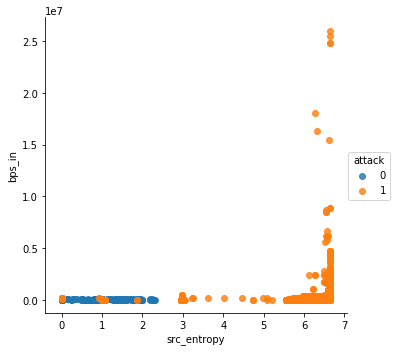

In [172]:
facet = sns.lmplot(data=dftrain,x='src_entropy' , y='bps_in',hue='attack',fit_reg=False,legend=True,legend_out=True)

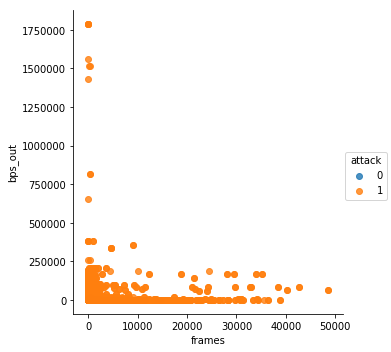

In [173]:
facet = sns.lmplot(data=dftrain,x='frames' , y='bps_out',hue='attack',fit_reg=False,legend=True,legend_out=True)

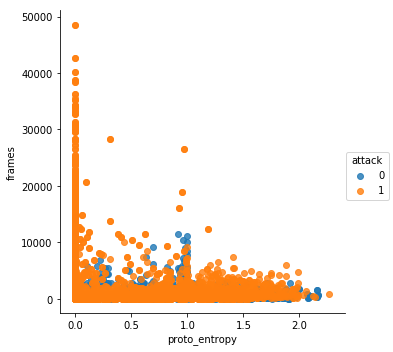

In [174]:
facet = sns.lmplot(data=dftrain,x='proto_entropy' , y='frames',hue='attack',fit_reg=False,legend=True,legend_out=True)

C:\Users\Pranay kumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pranay kumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

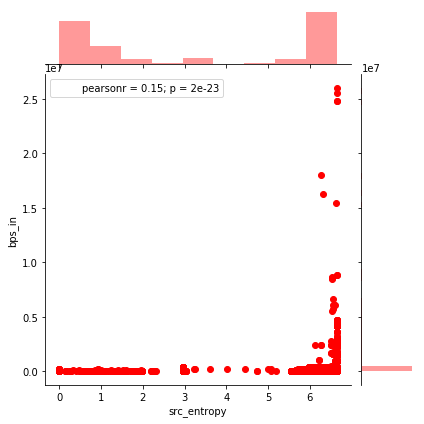

In [175]:
plt.figure(figsize=(10,10))
sns.jointplot( x="src_entropy" , y="bps_in",data=dftrain,color= 'Red')

C:\Users\Pranay kumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pranay kumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

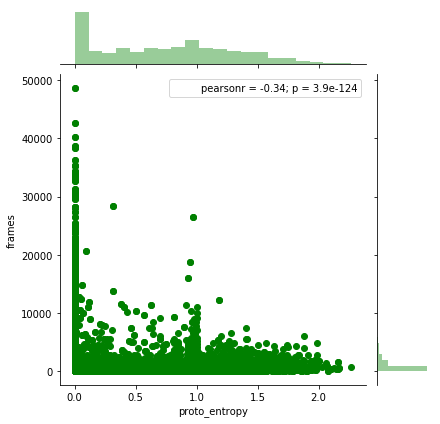

In [176]:
plt.figure(figsize=(10,10))
sns.jointplot( x="proto_entropy" , y="frames",data=dftrain,color= 'green')

In [177]:
dftrain.describe()

,frames,dst_entropy,src_entropy,proto_entropy,bps_in,bps_out,flows,attack
count,4609.000000,4609.000000,4609.000000,4609.000000,4.609000e+03,4.609000e+03,4.609000e+03,4609.000000
mean,2324.563463,0.393660,3.137245,0.744778,1.507781e+05,1.624785e+04,1.125546e+05,0.495118
std,5098.401488,0.714596,2.928704,0.549032,1.019686e+06,8.352071e+04,8.344883e+05,0.500030
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.420000e-126,0.000000
25%,305.000000,0.000000,0.000000,0.219965,7.737263e+03,1.191265e+03,7.350565e+02,0.000000
50%,719.000000,0.000000,1.583668,0.751827,1.597069e+04,1.990798e+03,2.504034e+03,0.000000
75%,1705.000000,0.741483,6.340211,1.164591,2.640009e+04,2.971200e+03,5.442562e+03,1.000000
max,48601.000000,2.983428,6.643856,2.265505,2.596817e+07,1.788674e+06,1.895376e+07,1.000000


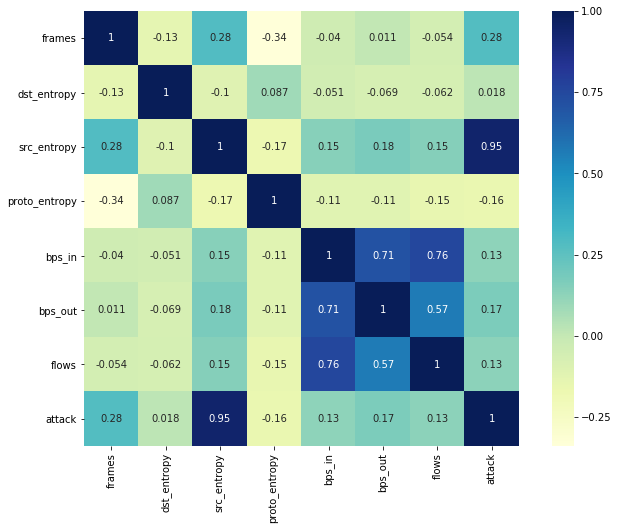

In [178]:
corr = dftrain.corr()
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,vmax=1,square=True,cbar=True,annot=True,cmap='YlGnBu')

In [179]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 8 columns):
frames           4609 non-null int64
dst_entropy      4609 non-null float64
src_entropy      4609 non-null float64
proto_entropy    4609 non-null float64
bps_in           4609 non-null float64
bps_out          4609 non-null float64
flows            4609 non-null float64
attack           4609 non-null int64
dtypes: float64(6), int64(2)
memory usage: 288.1 KB


In [180]:
y = dftrain['attack']
x = dftrain
del dftrain['attack']

In [181]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 7 columns):
frames           4609 non-null int64
dst_entropy      4609 non-null float64
src_entropy      4609 non-null float64
proto_entropy    4609 non-null float64
bps_in           4609 non-null float64
bps_out          4609 non-null float64
flows            4609 non-null float64
dtypes: float64(6), int64(1)
memory usage: 252.1 KB


In [182]:
#splitting data
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=52)

In [183]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 60 )
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.15%


In [184]:
import pickle

In [185]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
pred1 = clf.predict(x_test)
accuracy = accuracy_score(y_test, pred1)
accuracy

0.6992046276211136

In [186]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predml = mlp.predict(x_test)
accuracy = accuracy_score(y_test, predml)
accuracy

0.4699927693420101

In [187]:
#normalizing data

In [188]:
normalized_x = preprocessing.normalize(x)

In [189]:
dfx = pd.DataFrame(normalized_x,columns=['frames','dst_entropy','src_entropy','proto_entropy','bps_in','bps_out','flows'])
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 7 columns):
frames           4609 non-null float64
dst_entropy      4609 non-null float64
src_entropy      4609 non-null float64
proto_entropy    4609 non-null float64
bps_in           4609 non-null float64
bps_out          4609 non-null float64
flows            4609 non-null float64
dtypes: float64(7)
memory usage: 252.1 KB


In [190]:
y.to_frame()

,attack
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,0


In [191]:
data = pd.concat([dfx,y],axis=1)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 8 columns):
frames           4609 non-null float64
dst_entropy      4609 non-null float64
src_entropy      4609 non-null float64
proto_entropy    4609 non-null float64
bps_in           4609 non-null float64
bps_out          4609 non-null float64
flows            4609 non-null float64
attack           4609 non-null int64
dtypes: float64(7), int64(1)
memory usage: 288.1 KB


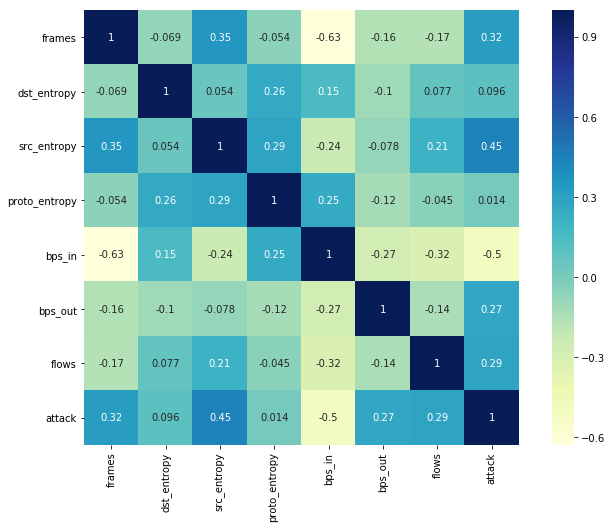

In [193]:
corr = data.corr()
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,vmax=1,square=True,cbar=True,annot=True,cmap='YlGnBu')

In [194]:
yy = data['attack']
xx = data
del data['attack']

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(xx,yy,test_size=0.3,random_state=52)

In [196]:
from sklearn.ensemble import GradientBoostingClassifier
predict = GradientBoostingClassifier()
predict.fit(x_train,y_train)
pred1 = predict.predict(x_test)
accuracy = accuracy_score(y_test, pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.86%


Confusion matrix, without normalization
[[708   1]
 [  1 673]]


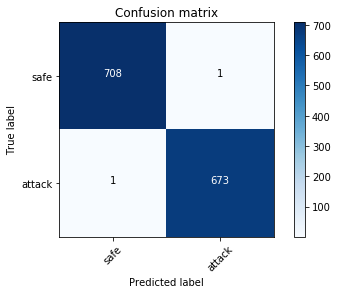

In [197]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, pred1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['safe','attack'],
                      title='Confusion matrix')

Normalized confusion matrix
[[0.99858956 0.00141044]
 [0.00148368 0.99851632]]


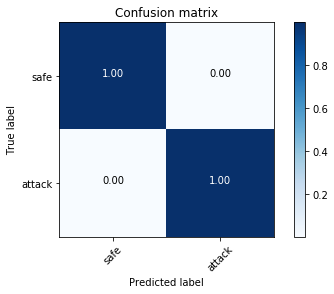

In [198]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, pred1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['safe','attack'],
                      title='Confusion matrix',normalize='True')

In [199]:
from sklearn.externals import joblib

In [200]:
filename= "gradientboost.sav"
joblib.dump(pred1,filename)

['gradientboost.sav']

In [201]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 60 )
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.06%


Confusion matrix, without normalization
[[673  36]
 [143 531]]


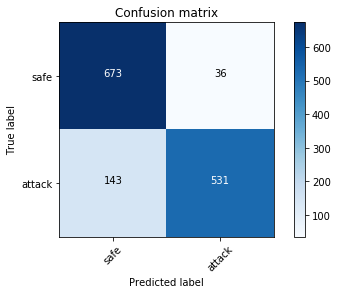

In [202]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['safe','attack'],
                      title='Confusion matrix')


Normalized confusion matrix
[[0.94922426 0.05077574]
 [0.21216617 0.78783383]]


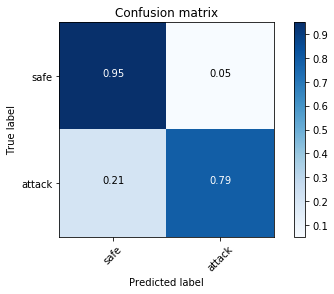

In [203]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['safe','attack'],
                      title='Confusion matrix',normalize='True')


In [204]:
filename= "knn.sav"
joblib.dump(pred1,filename)

['knn.sav']

In [205]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred2 = clf.predict(x_test)
accuracy = accuracy_score(y_test, pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.28%


Confusion matrix, without normalization
[[703   6]
 [  4 670]]


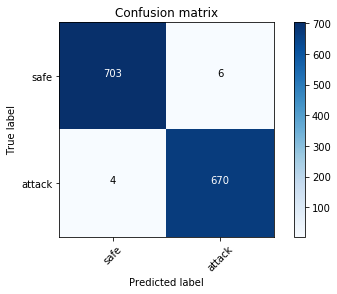

In [206]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, pred2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['safe','attack'],
                      title='Confusion matrix')


In [207]:
filename= "decision.sav"
joblib.dump(pred1,filename)

['decision.sav']

In [208]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
pred1 = clf.predict(x_test)
accuracy = accuracy_score(y_test, pred1)
accuracy

0.7975415762834418

Confusion matrix, without normalization
[[672  37]
 [243 431]]


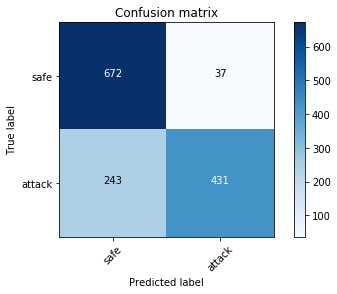

In [209]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, pred1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['safe','attack'],
                      title='Confusion matrix')


Normalized confusion matrix
[[0.94781382 0.05218618]
 [0.36053412 0.63946588]]


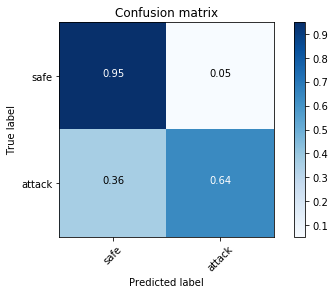

In [210]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, pred1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['safe','attack'],
                      title='Confusion matrix',normalize='True')


In [211]:
filename= "svm.sav"
joblib.dump(pred1,filename)

['svm.sav']

In [212]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predml = mlp.predict(x_test)
accuracy = accuracy_score(y_test, predml)
accuracy

C:\Users\Pranay kumar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8850325379609545

Confusion matrix, without normalization
[[677  32]
 [127 547]]


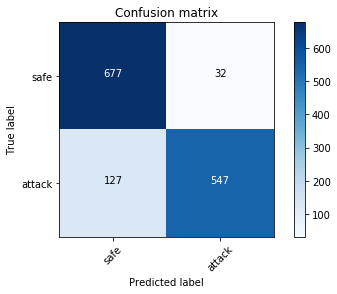

In [213]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, predml)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['safe','attack'],
                      title='Confusion matrix')


Normalized confusion matrix
[[0.56527977 0.43472023]
 [0.59766764 0.40233236]]


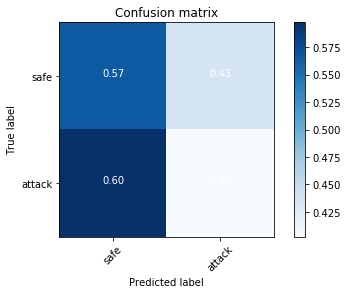

In [228]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, predml)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['safe','attack'],
                      title='Confusion matrix',normalize='True')


In [214]:
#standardization

In [215]:
standard_x = preprocessing.scale(x)

In [216]:
dfxx = pd.DataFrame(standard_x,columns=['frames','dst_entropy','src_entropy','proto_entropy','bps_in','bps_out','flows'])
dfxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 7 columns):
frames           4609 non-null float64
dst_entropy      4609 non-null float64
src_entropy      4609 non-null float64
proto_entropy    4609 non-null float64
bps_in           4609 non-null float64
bps_out          4609 non-null float64
flows            4609 non-null float64
dtypes: float64(7)
memory usage: 252.1 KB


In [217]:
dfx.head()

,frames,dst_entropy,src_entropy,proto_entropy,bps_in,bps_out,flows
0,0.044324,0.000000,0.000000,0.000052,0.980850,0.127062,0.140800
1,0.034617,0.000047,0.000047,0.000006,0.916958,0.082860,0.388748
2,0.003552,0.000000,0.000000,0.000092,0.975943,0.086788,0.199974
3,0.047099,0.000000,0.000000,0.000093,0.990518,0.093939,0.088494
4,0.001076,0.000051,0.000051,0.000092,0.963609,0.111649,0.242882


In [218]:
dfxx.head()

,frames,dst_entropy,src_entropy,proto_entropy,bps_in,bps_out,flows
0,-0.266105,-0.550945,-1.071322,0.702775,-0.126873,-0.161329,-0.131208
1,-0.357124,0.413323,-0.836043,-1.193463,-0.134789,-0.180112,-0.128110
2,-0.446573,-0.550945,-1.071322,0.898811,-0.134948,-0.180514,-0.131655
3,-0.327896,-0.550945,-1.071322,0.982212,-0.134414,-0.178962,-0.133423
4,-0.452458,0.633736,-0.782263,1.443753,-0.132076,-0.172197,-0.130025


In [219]:
data2 = pd.concat([dfxx,y],axis=1)

In [220]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 8 columns):
frames           4609 non-null float64
dst_entropy      4609 non-null float64
src_entropy      4609 non-null float64
proto_entropy    4609 non-null float64
bps_in           4609 non-null float64
bps_out          4609 non-null float64
flows            4609 non-null float64
attack           4609 non-null int64
dtypes: float64(7), int64(1)
memory usage: 288.1 KB


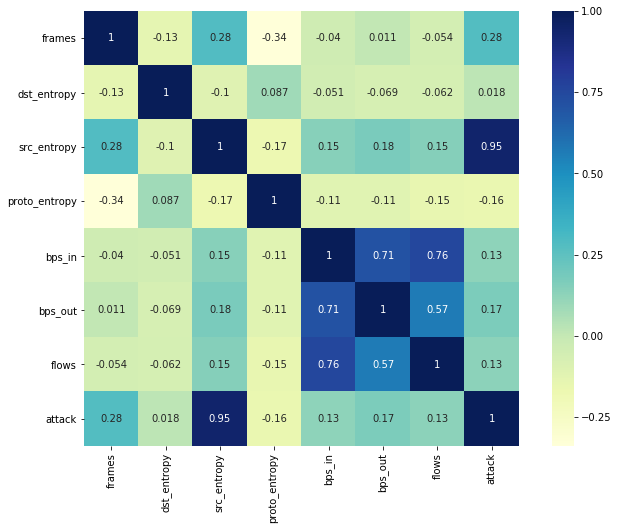

In [221]:
corr2 = data2.corr()
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr2,vmax=1,square=True,cbar=True,annot=True,cmap='YlGnBu')

In [222]:
yy = data2['attack']
xx = data2
del data2['attack']

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(xx,yy,test_size=0.3,random_state=7)

In [224]:
from sklearn.ensemble import GradientBoostingClassifier
predict = GradientBoostingClassifier()
predict.fit(x_train,y_train)
pred = predict.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [225]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 60 )
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.20%


In [226]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [227]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
pred1 = clf.predict(x_test)
accuracy = accuracy_score(y_test, pred1)
accuracy

1.0